In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("student_performance_large_dataset.csv")


In [3]:
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


# Basic information

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [5]:
df.describe()


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [6]:
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

# 1.What is the gender distribution among students?

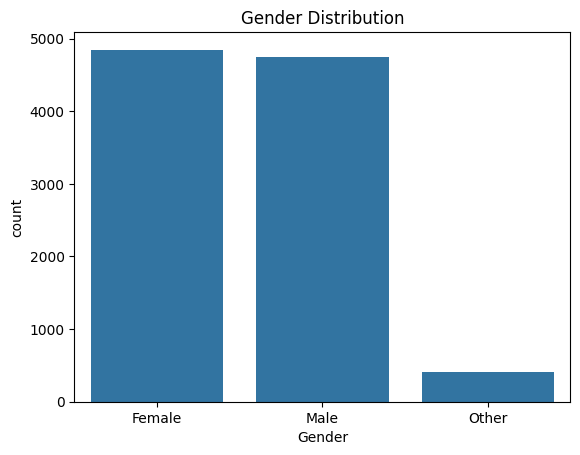

In [7]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

# 2.What is the distribution of Final Grades (A, B, C, D)?


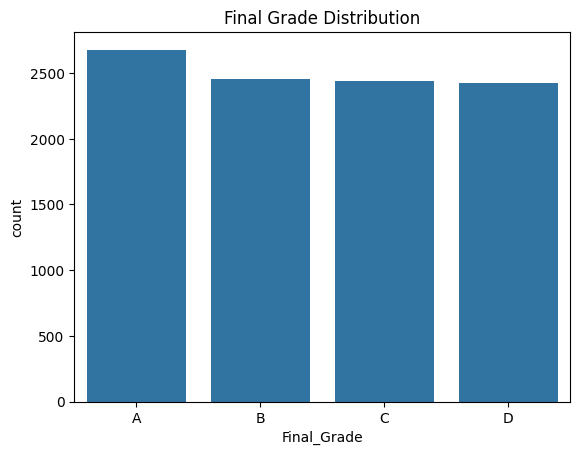

In [8]:
sns.countplot(data=df, x='Final_Grade', order=['A', 'B', 'C', 'D'])
plt.title("Final Grade Distribution")
plt.show()

# 3.How does stress level affect final grade?

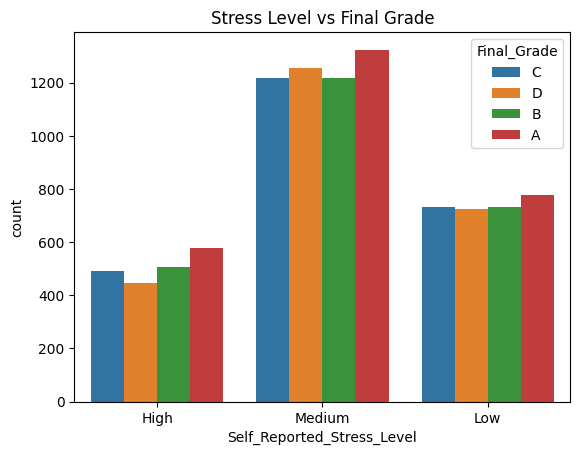

In [9]:
sns.countplot(data=df, x='Self_Reported_Stress_Level', hue='Final_Grade')
plt.title("Stress Level vs Final Grade")
plt.show()

# 4.Is there a relation between sleep hours and exam score?

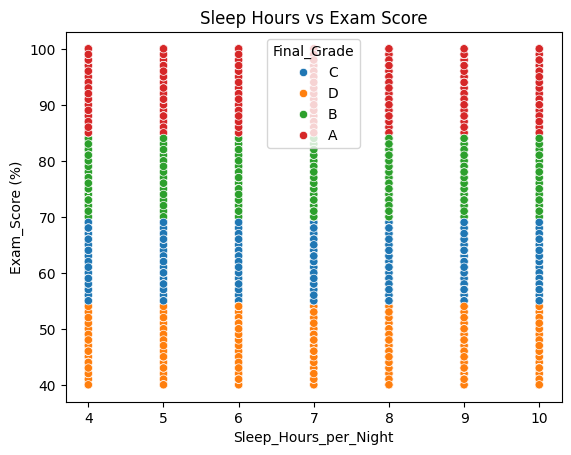

In [10]:
sns.scatterplot(data=df, x='Sleep_Hours_per_Night', y='Exam_Score (%)', hue='Final_Grade')
plt.title("Sleep Hours vs Exam Score")
plt.show()

# 5. Which learning style is most preferred?


Text(0.5, 1.0, 'Preferred Learning Styles')

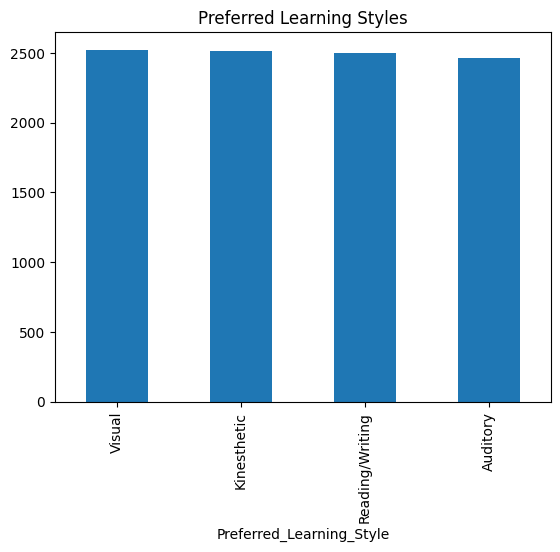

In [11]:
df['Preferred_Learning_Style'].value_counts().plot(kind='bar')
plt.title('Preferred Learning Styles')


# 6.Is there a relationship between Stress Level vs Final Grade?

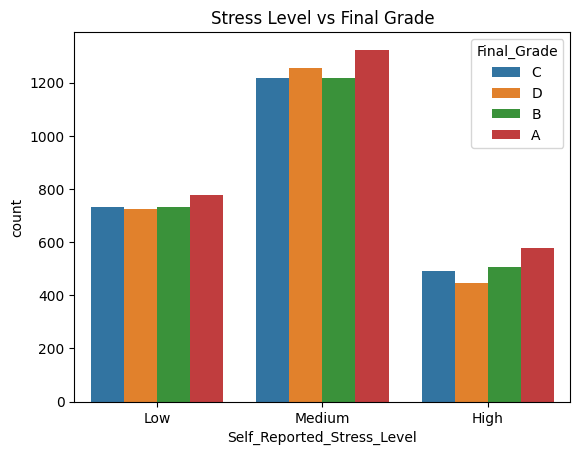

In [12]:
sns.countplot(data=df, x='Self_Reported_Stress_Level', hue='Final_Grade', order=['Low', 'Medium', 'High'])
plt.title("Stress Level vs Final Grade")
plt.show()


# 7.What is the Correlation Heatmap (Numerical Features)?



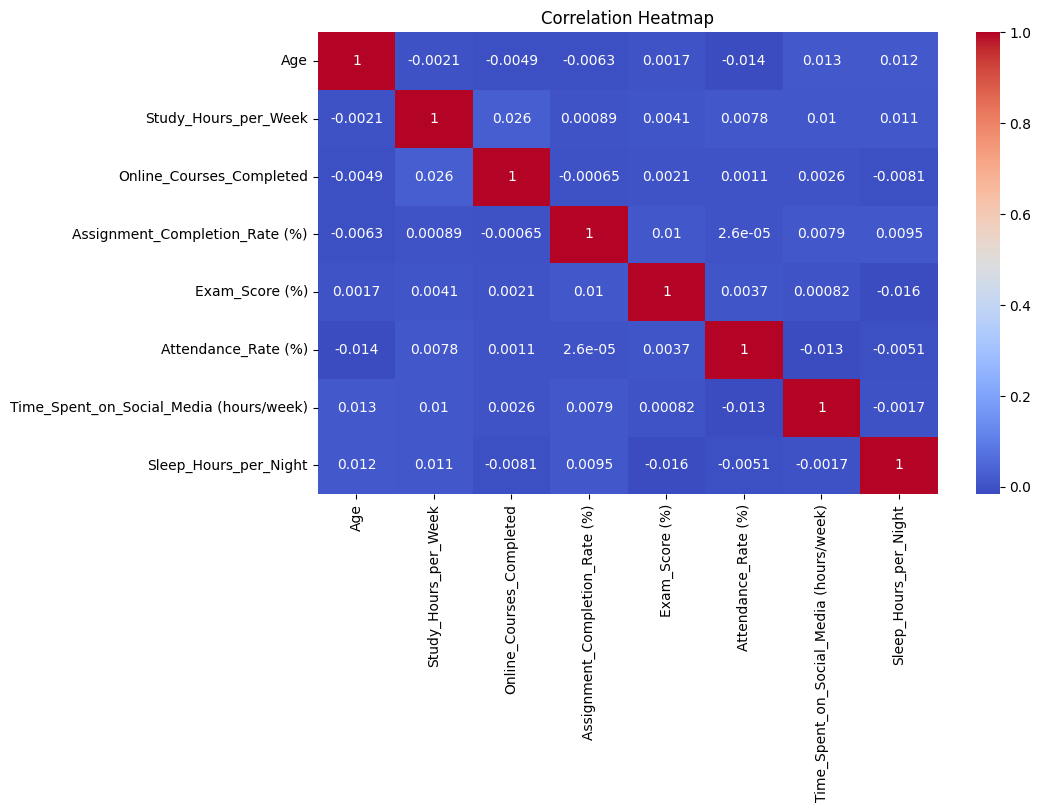

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 8.Grade distribution by use of educational technology?

<Axes: xlabel='Final_Grade', ylabel='count'>

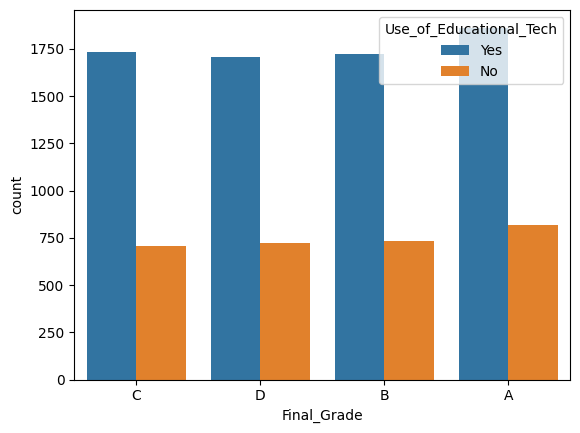

In [14]:
sns.countplot(x='Final_Grade', hue='Use_of_Educational_Tech', data=df)

# 9.How does gender affect the final grade?

Text(0.5, 1.0, 'Gender-wise Grade Distribution')

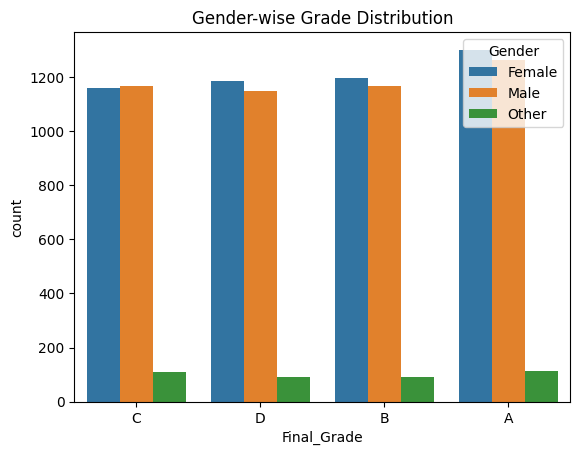

In [15]:
sns.countplot(x='Final_Grade', hue='Gender', data=df)
plt.title('Gender-wise Grade Distribution')


# 10.Does Study Hours correlate with Exam Score?

<Axes: xlabel='Study_Hours_per_Week', ylabel='Exam_Score (%)'>

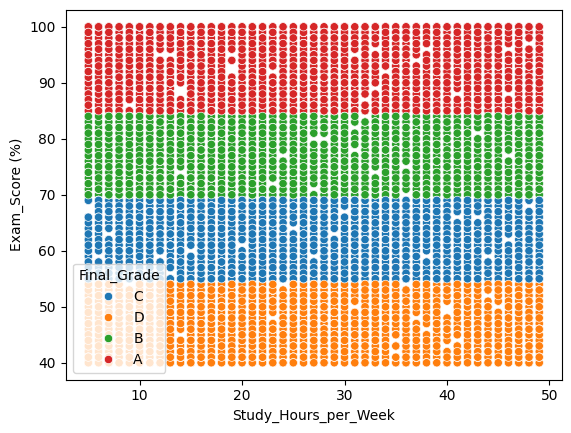

In [16]:
sns.scatterplot(x='Study_Hours_per_Week', y='Exam_Score (%)', hue='Final_Grade', data=df)